In [1]:
import pandas as pd
df = pd.read_csv('df_zscores.csv')
df.columns

Index(['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses',
       'masa_corporal', 'haz', 'waz', 'bmiz'],
      dtype='object')

In [2]:
df.head(-5)

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33,-0.07,1.19
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36,0.11,1.07
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27,0.34,3.07
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76,-0.16,0.39
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61,0.38,0.28
...,...,...,...,...,...,...,...,...,...,...
1159387,299999,M,10.3,70.0,232.0,7.6,21.02,0.38,2.01,2.31
1159388,299999,M,10.3,74.0,302.0,9.9,18.81,0.91,1.35,1.11
1159389,299999,M,12.9,80.0,535.0,17.5,20.16,-0.47,1.67,2.59
1159390,299999,M,16.7,94.0,1003.0,32.9,18.90,0.34,1.64,2.26


In [3]:
df.shape

(1159397, 10)

In [4]:
#individuos totales = 299999

In [5]:
import numpy as np
individuos = np.arange(1,300000)
len(individuos)

299999

In [6]:
#queremos chequear que la talla sea igual o mayor conforme pasa el tiempo
#lista_tallas_anormales=[]
#for i in range(0 , len(individuos)):
 #   subdf = df[df['id_individuo']==individuos[i]]#hasta aca devuelve un subdf con el Iesimo individuo
  #  for j in range(0 , subdf.shape[0]-1):
   #     if(subdf.loc[j+1 , ['talla']].item() < subdf.loc[j , ['talla']].item()):#aca evaluo si en la siguiente fecha la talla es <
    #        lista_tallas_anormales.append((individuos[i] , subdf))#caso afirmativo, que guarde el indiv , y el df
            #reescribo abajo, por comodiad

In [7]:
#verifico errores que me tira
#subdf.loc[1 , ['talla']]

In [8]:
#subdf.shape[0]-1#esta ok

In [9]:
#(df[df['id_individuo']==individuos[1]]).info()#es df de pandas, y los tipos de datos estan bien

In [10]:
#subdf.loc[1 , ['talla']] < subdf.loc[0 , ['talla']]#anda

In [11]:
#subdf.loc[1 , ['talla']].info()#aca esta le problema, es una serie...

In [12]:
#pd.DataFrame(subdf.loc[1 , ['talla']]).info()

In [13]:
#df.loc[0 , ['talla']].item()#resuelto, resuelto?

In [14]:
#queremos chequear que la talla sea igual o mayor conforme pasa el tiempo
individuos = np.arange(1,300000)
lista_tallas_anormales=[]
for i in range(0 , len(individuos)):
    subdf = df[df['id_individuo']==individuos[i]]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        if(subdf.iloc[j+1 , 3].item() < subdf.iloc[j , 3].item()):#aca evaluo si en la siguiente fecha la talla es <
            lista_tallas_anormales.append((individuos[i] , subdf))#caso afirmativo, que guarde el indiv , y el df

In [15]:
len(lista_tallas_anormales)

80782

In [16]:
#chequiemos el problema
df[df['id_individuo']==individuos[i]]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
1159387,299999,M,10.3,70.0,232.0,7.6,21.02,0.38,2.01,2.31
1159388,299999,M,10.3,74.0,302.0,9.9,18.81,0.91,1.35,1.11
1159389,299999,M,12.9,80.0,535.0,17.5,20.16,-0.47,1.67,2.59
1159390,299999,M,16.7,94.0,1003.0,32.9,18.90,0.34,1.64,2.26
1159391,299999,M,18.2,101.0,1354.0,44.4,17.84,0.20,1.22,1.77


In [17]:
df[df['id_individuo']==individuos[i]].iloc[0 , 3]#resuelto usando iloc en lugar de loc

70.0

In [18]:
lista_tallas_anormales[0][0]

3

In [19]:
#ahora sigo...

In [20]:
#hasta ahora logre hacer el ciclo anidado que recorre todo subdf por idnicviduo, y evalua si alguna talla en 
#timpo t+1 es < a talla en tiempo t, y lo guarda en una lsita, con una tupla de (individuo,df)
#voy a usar la lsita con las tuplas, y voy a sacar al primer elemento , que es el del individuo
# y evaluar cuantos individuos compete, usando conjuntos
lista_ind_anormales=[]
for k in range(0,len(lista_tallas_anormales)):
    lista_ind_anormales.append(lista_tallas_anormales[k][0])
len(lista_ind_anormales)

80782

In [21]:
#ahora hago el conjunto, para evaluar cuantos indiciduos osn efectivamente
conjunto_ind_anormales = set(lista_ind_anormales)
len(conjunto_ind_anormales)

67383

In [22]:
anormales_listados = list(conjunto_ind_anormales)
len(conjunto_ind_anormales)

67383

In [23]:
#ahora ya tengo a anormales_listados como lista de inidividuos unicos cuya talla es menor en al menos un t+1<t
#chequiemos algunos casos, como para ver en que % cambia
#armo lista de df con los indiv que orovienen de anormales_listados
lista_df_anormales_individuales = []

for ind in range(0,len(anormales_listados)):
    dfsub = df[df['id_individuo']==anormales_listados[ind]]
    lista_df_anormales_individuales.append(dfsub)
len(lista_df_anormales_individuales)

67383

In [24]:
lista_df_anormales_individuales[0]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
506450,131072,F,23.8,129.0,2641.0,86.6,14.30,1.07,0.12,-0.85
506451,131072,F,26.1,131.0,3062.0,100.4,15.21,0.22,-0.16,-0.43
506452,131072,F,25.6,129.0,3174.0,104.1,15.38,-0.40,-0.51,-0.41


In [25]:
lista_df_anormales_individuales[100]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
597,159,M,9.3,73.0,506.0,16.6,17.45,-2.79,-1.12,0.82
598,159,M,8.8,73.0,620.0,20.3,16.51,-3.98,-2.26,0.42
599,159,M,12.1,85.0,910.0,29.8,16.75,-1.55,-0.97,0.71
600,159,M,11.8,84.0,1067.0,35.0,16.72,-2.99,-1.80,0.84
601,159,M,14.7,93.0,1211.0,39.7,17.00,-1.08,-0.09,1.13
602,159,M,16.3,101.0,1397.0,45.8,15.98,0.05,0.26,0.46
603,159,M,15.7,107.0,1617.0,53.0,13.71,0.38,-0.77,-1.31
604,159,M,15.7,107.0,1750.0,57.4,13.71,-0.12,-1.11,-1.26
605,159,M,18.6,108.0,1914.0,62.8,15.95,-0.48,-0.11,0.43


In [26]:
lista_df_anormales_individuales[1000]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
1018793,263646,F,13.4,91.0,884.0,29.0,16.18,0.38,0.34,0.46
1018794,263646,F,13.4,94.0,1150.0,37.7,15.17,-0.20,-0.43,-0.16
1018795,263646,F,18.0,108.0,1729.0,56.7,15.43,0.51,0.28,0.12
1018796,263646,F,19.8,117.0,1998.0,65.5,14.46,1.20,0.29,-0.58
1018797,263646,F,20.6,119.0,2137.0,70.1,14.55,0.98,0.22,-0.50
1018798,263646,F,22.5,124.0,2212.0,72.5,14.63,1.66,0.63,-0.45
1018799,263646,F,27.8,127.0,2549.0,83.6,17.24,1.02,1.14,0.91
1018800,263646,F,24.7,125.0,2649.0,86.9,15.81,0.38,0.34,0.18
1018801,263646,F,35.0,136.0,3444.0,112.9,18.92,0.19,0.70,0.90


In [27]:
#de una inspecci'on ocular, se ve que la diferecnia es muy pequenia. podr'iamos probar con una tolerancia de 
#hasta un 10%. pero tal vez vale la pena realizar la descripcion estadistica primero
lista_df_anormales_individuales[10000]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
57438,14993,F,11.2,76.0,444.0,14.6,19.39,-0.14,1.41,2.04
57439,14993,F,11.9,80.0,554.0,18.2,18.59,-0.24,1.20,1.86
57440,14993,F,12.2,81.0,626.0,20.5,18.59,-0.57,1.08,1.95
57441,14993,F,12.7,86.0,680.0,22.3,17.17,0.45,1.10,1.17
57442,14993,F,13.7,94.0,801.0,26.3,15.50,1.90,0.85,-0.10
57443,14993,F,14.2,92.0,928.0,30.4,16.78,0.44,0.72,0.90
57444,14993,F,14.6,95.0,990.0,32.5,16.18,0.84,0.75,0.52
57445,14993,F,15.9,101.0,1115.0,36.6,15.59,1.69,1.03,0.15
57446,14993,F,15.7,101.0,1150.0,37.7,15.39,1.53,0.85,0.01
57447,14993,F,16.0,101.0,1235.0,40.5,15.68,1.08,0.72,0.25


In [28]:
#voy a usar df0[df0['id_individuo'].isin(lista_id)]  usando una lsita dei individuos con 
#anormalidades(anormales_listados) ya que quiero armar un df, con esos individuos para luego analizar los deltas
#temporales, y de talla, y ver los histogramas. por rnago etareo de 0-6 meses , de 6 meses a 2 anios y de 2 a 5
# podria hacerse lo mismo para los NO anormales, y evaluar
# o eliminando el dato anormal
#se puede agregar col 'bool_talla' , 'bool_peso' y que tengan False en esos casos
#df[df['id_individuo'].isin(anormales_listados)]

In [29]:
#primero dejo lso plausibles(copiado de Daiana)
df_plau = df[((df['haz']<=6) & (df['haz']>=(-6))) &
                      ((df['waz']<=5) & (df['waz']>=(-6))) &
                      ((df['bmiz']<=5) & (df['bmiz']>=(-5)))] # esto pide que los tres estén en rango

df_no_plau = df[((df['haz']>6) | (df['haz']<(-6))) |
                      ((df['waz']>5) | (df['waz']<(-6))) |
                      ((df['bmiz']>5) | (df['bmiz']<(-5)))] # esto me devuelve los que t

print('dim plau: ' , df_plau.shape , 'dim no_plau: ' , df_no_plau.shape)

dim plau:  (1122845, 10) dim no_plau:  (36552, 10)


In [30]:
#queremos chequear que la talla sea igual o mayor conforme pasa el tiempo
#individuos = np.arange(1,300000)
lista_tallas_anormales=[]
for i in range(0 , len(individuos)):
    subdf = df_plau[df_plau['id_individuo']==individuos[i]]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        if(subdf.iloc[j+1 , 3].item() < subdf.iloc[j , 3].item()):#aca evaluo si en la siguiente fecha la talla es <
            lista_tallas_anormales.append((individuos[i] , subdf))#caso afirmativo, que guarde el indiv , y el df

In [31]:
#hasta ahora logre hacer el ciclo anidado que recorre todo subdf por idnicviduo, y evalua si alguna talla en 
#timpo t+1 es < a talla en tiempo t, y lo guarda en una lsita, con una tupla de (individuo,df)
#voy a usar la lsita con las tuplas, y voy a sacar al primer elemento , que es el del individuo
# y evaluar cuantos individuos compete, usando conjuntos
lista_ind_anormales=[]
for k in range(0,len(lista_tallas_anormales)):
    lista_ind_anormales.append(lista_tallas_anormales[k][0])
print('long lista ind anormales: ' , len(lista_ind_anormales))
#ahora hago el conjunto, para evaluar cuantos indiciduos osn efectivamente
conjunto_ind_anormales = set(lista_ind_anormales)
print('conjunto ind anormales: ' , len(conjunto_ind_anormales))
anormales_listados = list(conjunto_ind_anormales)
print('longitud lista de anormales unicos: ' , len(anormales_listados))

long lista ind anormales:  64900
conjunto ind anormales:  55715
longitud lista de anormales unicos:  55715


In [32]:
#dentro de  df_plau miremos...
df_plau_anormales_talla = df_plau[df_plau['id_individuo'].isin(anormales_listados)]
print('dim df_plau_anormales_talla: ' , df_plau_anormales_talla.shape)

dim df_plau_anormales_talla:  (283763, 10)


In [33]:
#busco los delta de tiempo en meses , y de talla
lista_delta_tallas = []
lista_delta_meses = []
for i in range(0 , len(anormales_listados)):
    subdf = df_plau_anormales_talla[df_plau_anormales_talla['id_individuo']==anormales_listados[i]]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        if(subdf.iloc[j+1 , 3].item() < subdf.iloc[j , 3].item()):#aca evaluo si en la siguiente fecha la talla es <
            lista_delta_tallas.append(subdf.iloc[j , 3].item() - subdf.iloc[j+1 , 3].item())#caso afirmativo, que guarde el indiv , y el df
            lista_delta_meses.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas: ' , len(lista_delta_tallas) , 'long meses: ' , len(lista_delta_meses))

long tallas:  64900 long meses:  64900


<AxesSubplot:>

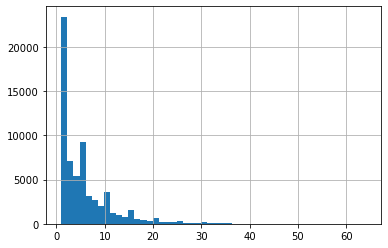

In [34]:
pd.Series(lista_delta_tallas).hist(bins=50)

<AxesSubplot:>

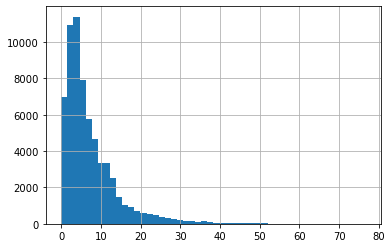

In [35]:
pd.Series(lista_delta_meses).hist(bins=50)

In [36]:
#df_plau_talla.columns

NameError: name 'df_plau_talla' is not defined

In [ ]:
#ahora podemos comparar con los plausibles, sin los anormales

In [37]:
df_plau_talla = df_plau[~df_plau['id_individuo'].isin(anormales_listados)]
print('dim df_plau_talla: ' , df_plau_talla.shape)

dim df_plau_talla:  (839082, 10)


In [38]:
#busco los delta de tiempo en meses , y de talla
lista_delta_tallas_plau = []
lista_delta_meses_plau = []
for i in (df_plau_talla['id_individuo'].unique()):
    subdf = df_plau_talla[df_plau_talla['id_individuo'] == i]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_tallas_plau.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_plau.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas: ' , len(lista_delta_tallas_plau) , 'long meses: ' , len(lista_delta_meses_plau))

long tallas:  595394 long meses:  595394


<AxesSubplot:>

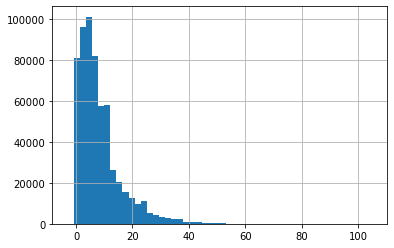

In [39]:
pd.Series(lista_delta_tallas_plau).hist(bins=50)

<AxesSubplot:>

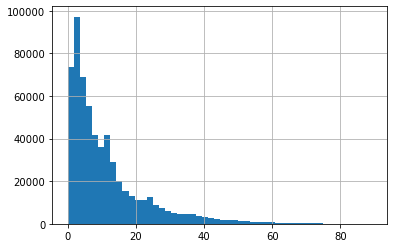

In [40]:
pd.Series(lista_delta_meses_plau).hist(bins=50)

In [41]:
#para cada rango etario, podemso hacer este mismo histograma

In [42]:
#busco los delta de tiempo en meses , y de talla, por rnago etario
lista_delta_tallas_plau_menor6meses = []
lista_delta_meses_plau_menor6meses = []
for i in (df_plau_talla['id_individuo'].unique()):
    subdf = df_plau_talla[(df_plau_talla['id_individuo'] == i) & (df_plau_talla['edad_meses'] <= 6)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_tallas_plau_menor6meses.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_plau_menor6meses.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas de 0 6 meses : ' , len(lista_delta_tallas_plau_menor6meses) , 'long mesesde 0 a 6 meses : ' , len(lista_delta_meses_plau_menor6meses))

lista_delta_tallas_plau_6Ma2A = []
lista_delta_meses_plau_6Ma2A = []
for i in (df_plau_talla['id_individuo'].unique()):
    subdf = df_plau_talla[(df_plau_talla['id_individuo'] == i) & (df_plau_talla['edad_meses'] > 6) & (df_plau_talla['edad_meses'] <= 24)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_tallas_plau_6Ma2A.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_plau_6Ma2A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas 6Ma2A : ' , len(lista_delta_tallas_plau_6Ma2A) , 'long meses 6Ma2A : ' , len(lista_delta_meses_plau_6Ma2A))

lista_delta_tallas_plau_2Aa5A = []
lista_delta_meses_plau_2Aa5A = []
for i in (df_plau_talla['id_individuo'].unique()):
    subdf = df_plau_talla[(df_plau_talla['id_individuo'] == i) & (df_plau_talla['edad_meses'] > 24) & (df_plau_talla['edad_meses'] <= 60)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_tallas_plau_2Aa5A.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_plau_2Aa5A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas 2Aa5A : ' , len(lista_delta_tallas_plau_2Aa5A) , 'long meses 2Aa5A : ' , len(lista_delta_meses_plau_2Aa5A))

long tallas de 0 6 meses :  66521 long mesesde 0 a 6 meses :  66521
long tallas 6Ma2A :  114783 long meses 6Ma2A :  114783
long tallas 2Aa5A :  88369 long meses 2Aa5A :  88369


<AxesSubplot:>

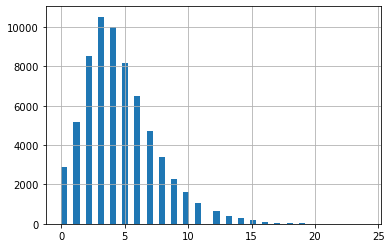

In [43]:
pd.Series(lista_delta_tallas_plau_menor6meses).hist(bins=50)

<AxesSubplot:>

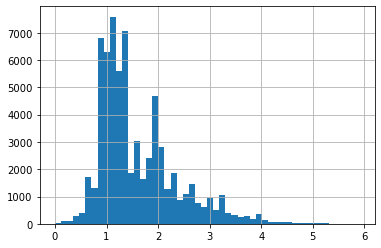

In [44]:
pd.Series(lista_delta_meses_plau_menor6meses).hist(bins=50)#3cm/mes

<AxesSubplot:>

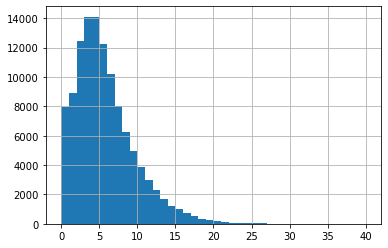

In [45]:
pd.Series(lista_delta_tallas_plau_6Ma2A).hist(bins=40)

<AxesSubplot:>

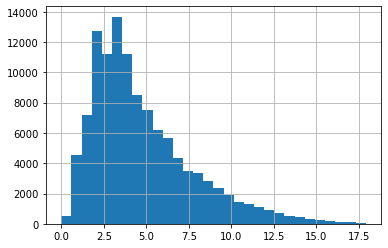

In [46]:
pd.Series(lista_delta_meses_plau_6Ma2A).hist(bins=30)

In [47]:
#1cm/mes

<AxesSubplot:>

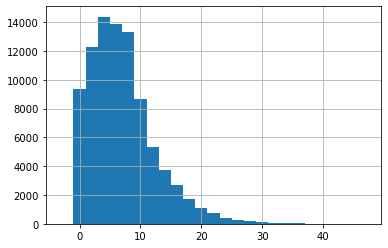

In [48]:
pd.Series(lista_delta_tallas_plau_2Aa5A).hist(bins=25)

In [49]:
#0.7cm/mes aprox

In [ ]:
#talla para mayores de 5 A

In [119]:
#para lso mayores de 5 anios

lista_delta_tallas_plau_mayores5A = []
lista_delta_meses_plau_mayores5A = []
for i in (df_plau_talla['id_individuo'].unique()):
    subdf = df_plau_talla[(df_plau_talla['id_individuo'] == i) & (df_plau_talla['edad_meses'] >60)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_tallas_plau_mayores5A.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_plau_mayores5A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long tallas mayores5A : ' , len(lista_delta_tallas_plau_mayores5A) , 'long mesesde 0 a 6 meses : ' , len(lista_delta_meses_plau_mayores5A))

long tallas mayores5A :  159903 long mesesde 0 a 6 meses :  159903


<AxesSubplot:>

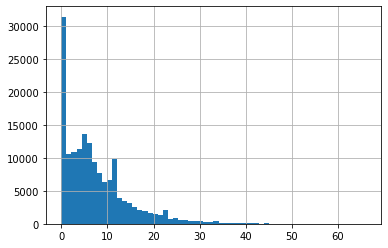

In [120]:
pd.Series(lista_delta_tallas_plau_mayores5A).hist(bins=60)

<AxesSubplot:>

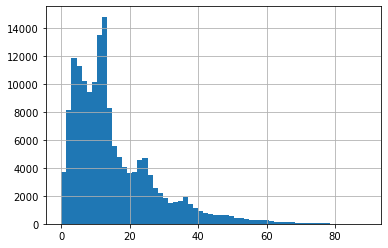

In [121]:
pd.Series(lista_delta_meses_plau_mayores5A).hist(bins=60)

In [126]:
tasa_talla_mayores5A = pd.Series(lista_delta_tallas_plau_mayores5A).median()/pd.Series(lista_delta_meses_plau_mayores5A).median()

In [127]:
tasa_talla_mayores5A

0.5

In [ ]:
#ahora para el peso

In [ ]:
#definimos rangos de 5 a 10A

#y otro de 10 a 19A

In [122]:
lista_delta_pesos_plau_5A_10A = []
lista_delta_pesos_plau_meses_5A_10A = []
for i in (df_plau_pesos['id_individuo'].unique()):
    subdf = df_plau_pesos[(df_plau_pesos['id_individuo'] == i) & (df_plau_pesos['edad_meses'] >60) & (df_plau_pesos['edad_meses'] <= 120)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_plau_5A_10A.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_pesos_plau_meses_5A_10A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos mayores5A : ' , len(lista_delta_pesos_plau_5A_10A) , 'long mesesde 0 a 6 meses : ' , len(lista_delta_pesos_plau_meses_5A_10A))


#los mayores a 10 anios
lista_delta_pesos_plau_mayores10A = []
lista_delta_pesos_plau_meses_mayores10A = []
for i in (df_plau_pesos['id_individuo'].unique()):
    subdf = df_plau_pesos[(df_plau_pesos['id_individuo'] == i) & (df_plau_pesos['edad_meses'] >120)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_plau_mayores10A.append(subdf.iloc[j+1 , 3].item() - subdf.iloc[j , 3].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_pesos_plau_meses_mayores10A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos mayores10A : ' , len(lista_delta_pesos_plau_mayores10A) , 'long mesesde mayores10A : ' , len(lista_delta_pesos_plau_meses_mayores10A))

long pesos mayores5A :  89145 long mesesde 0 a 6 meses :  89145
long pesos mayores10A :  89145 long mesesde mayores10A :  89145


In [123]:
print('long pesos mayores10A : ' , len(lista_delta_pesos_plau_mayores10A) , 'long mesesde mayores10A : ' , len(lista_delta_pesos_plau_meses_mayores10A))

long pesos mayores10A :  40133 long mesesde mayores10A :  40133


<AxesSubplot:>

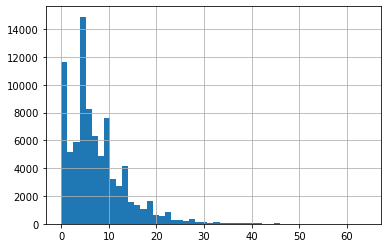

In [133]:
pd.Series(lista_delta_pesos_plau_5A_10A)[(pd.Series(lista_delta_pesos_plau_5A_10A)>=0)].hist(bins=50)

<AxesSubplot:>

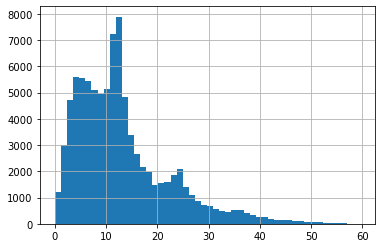

In [134]:
pd.Series(lista_delta_pesos_plau_meses_5A_10A).hist(bins=50)

<AxesSubplot:>

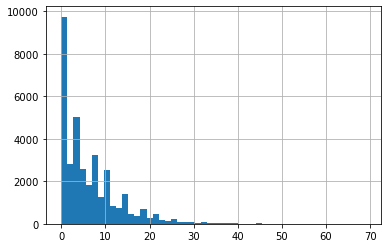

In [128]:
pd.Series(lista_delta_pesos_plau_mayores10A)[pd.Series(lista_delta_pesos_plau_mayores10A)>=0].hist(bins=50)

<AxesSubplot:>

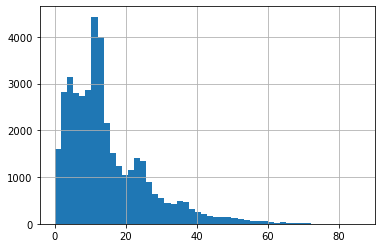

In [125]:
pd.Series(lista_delta_pesos_plau_meses_mayores10A).hist(bins=50)

In [135]:
#tasa pesos
tasa_pesos_5Aa10A = pd.Series(lista_delta_pesos_plau_5A_10A)[(pd.Series(lista_delta_pesos_plau_5A_10A)>=0)].median()/pd.Series(lista_delta_pesos_plau_meses_5A_10A).median()

In [136]:
tasa_pesos_5Aa10A

0.5309734513274331

In [129]:
tasa_peso_mayores10A = pd.Series(lista_delta_pesos_plau_mayores10A)[pd.Series(lista_delta_pesos_plau_mayores10A)>=0].median()/pd.Series(lista_delta_pesos_plau_meses_mayores10A).median()

In [130]:
tasa_peso_mayores10A

0.42016806722689054

<AxesSubplot:>

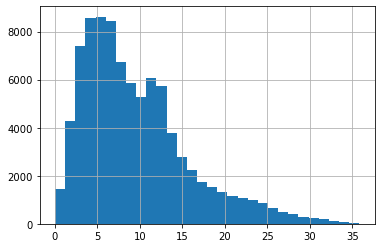

In [50]:
pd.Series(lista_delta_meses_plau_2Aa5A).hist(bins=30)

In [51]:
#probar usnado el desvio estandar
pd.Series(lista_delta_tallas_plau_menor6meses).describe()

count    66521.000000
mean         4.591978
std          2.946209
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         24.000000
dtype: float64

In [52]:
pd.Series(lista_delta_tallas_plau_2Aa5A).describe()

count    88369.000000
mean         6.557537
std          5.357777
min         -3.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         47.000000
dtype: float64

In [53]:
pd.Series(lista_delta_tallas_plau_6Ma2A).describe()

count    114783.000000
mean          5.276731
std           3.956512
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          40.000000
dtype: float64

In [54]:
#chequeo una cosa, para ver como calcular la tasa
#pd.Series(lista_delta_meses_plau_2Aa5A).hist(bins=30).mean()#no funciona

In [55]:
pd.Series(lista_delta_tallas_plau_2Aa5A).value_counts().sort_values(ascending=True)

-3.0        1
 47.0       1
 43.0       1
 42.0       2
 45.0       2
 41.0       3
 39.0       5
 40.0       6
 38.0       8
 36.0       9
 37.0      11
 35.0      18
 34.0      22
 32.0      23
 33.0      25
 31.0      46
 29.0      55
 30.0      73
 28.0      76
 26.0      83
 27.0      97
 25.0     162
 24.0     185
 23.0     249
 22.0     335
 21.0     391
 20.0     512
 19.0     615
 18.0     795
 17.0     944
 16.0    1274
 15.0    1441
 14.0    1759
 13.0    1958
 12.0    2461
 11.0    2890
 10.0    3949
 9.0     4691
 1.0     5696
 7.0     6549
 2.0     6594
 6.0     6688
 8.0     6772
 3.0     7025
 5.0     7177
 4.0     7348
 0.0     9342
dtype: int64

In [56]:
pd.Series(lista_delta_tallas_plau_2Aa5A)[pd.Series(lista_delta_tallas_plau_2Aa5A)==-3]#aparen

88368   -3.0
dtype: float64

In [57]:
df_plau_anormales_talla.filter(items =[88368] , axis=0)#este seria el individuo a descartar, ya que el delta da -3, verifiquemos...

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
88368,23042,M,54.3,170.0,5974.0,195.9,18.79,-0.56,-0.83,-0.81


In [81]:
#chequiemos los de delta 1 cm
pd.Series(lista_delta_tallas_plau_6Ma2A).value_counts().sort_values(ascending=True)

40.0        1
36.0        1
35.0        1
34.0        3
33.0        3
32.0        5
29.0        5
30.0        6
31.0        7
28.0       11
27.0       18
26.0       22
25.0       46
24.0       47
23.0       56
22.0       86
21.0      145
20.0      193
19.0      233
18.0      354
17.0      541
16.0      712
15.0     1029
14.0     1234
13.0     1667
12.0     2332
11.0     3011
10.0     3844
9.0      4939
8.0      6284
0.0      7966
7.0      7996
1.0      8889
6.0     10186
5.0     12267
2.0     12447
3.0     14092
4.0     14104
dtype: int64

In [83]:
pd.Series(lista_delta_tallas_plau_menor6meses).value_counts().sort_values(ascending=True)

24.0        1
21.0        2
22.0        3
20.0       13
19.0       22
18.0       38
17.0       56
16.0       91
15.0      178
14.0      295
13.0      419
12.0      667
11.0     1035
10.0     1595
9.0      2278
0.0      2864
8.0      3374
7.0      4711
1.0      5193
6.0      6492
5.0      8166
2.0      8530
4.0      9975
3.0     10523
dtype: int64

In [58]:
#entonces si habri que eliminar a este dato, pero primero evaluemos al individuo 23042

In [59]:
df_plau_anormales_talla[df_plau_anormales_talla['id_individuo']==23042]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
88366,23042,M,53.4,169.0,5484.0,179.8,18.70,-0.09,-0.27,-0.45
88367,23042,M,55.3,167.0,5801.0,190.2,19.83,-0.80,-0.52,-0.23
88368,23042,M,54.3,170.0,5974.0,195.9,18.79,-0.56,-0.83,-0.81


In [60]:
#chequeo que no este en df_plau_talla
df_plau_talla.filter(items =[88368] , axis=0)

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz


In [61]:
df_plau_talla[df_plau_talla['id_individuo']==23042]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz


In [62]:
#quiero eliminar ese -3
serie_delta_tallas_plau_2Aa5A = pd.Series(lista_delta_tallas_plau_2Aa5A).drop(88368 , axis=0)

In [63]:
serie_delta_tallas_plau_2Aa5A.value_counts().sort_values()

47.0       1
43.0       1
45.0       2
42.0       2
41.0       3
39.0       5
40.0       6
38.0       8
36.0       9
37.0      11
35.0      18
34.0      22
32.0      23
33.0      25
31.0      46
29.0      55
30.0      73
28.0      76
26.0      83
27.0      97
25.0     162
24.0     185
23.0     249
22.0     335
21.0     391
20.0     512
19.0     615
18.0     795
17.0     944
16.0    1274
15.0    1441
14.0    1759
13.0    1958
12.0    2461
11.0    2890
10.0    3949
9.0     4691
1.0     5696
7.0     6549
2.0     6594
6.0     6688
8.0     6772
3.0     7025
5.0     7177
4.0     7348
0.0     9342
dtype: int64

<AxesSubplot:>

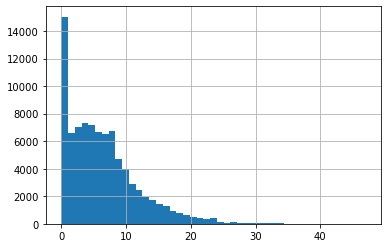

In [64]:
serie_delta_tallas_plau_2Aa5A.hist(bins=45)

<AxesSubplot:>

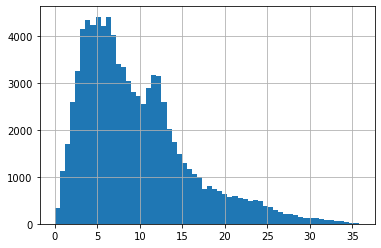

In [65]:
pd.Series(lista_delta_meses_plau_2Aa5A).hist(bins=60)

In [66]:
#puedo pedirle una medida de resumen a serie_delta_tallas_plau_2Aa5A , paraclacular la tasa

In [67]:
serie_delta_tallas_plau_2Aa5A.describe()

count    88368.000000
mean         6.557645
std          5.357711
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         47.000000
dtype: float64

In [ ]:
#circa 20k con delta 1 cm

In [68]:
#como el percentil 50% es la mediana, usar'ia ese dato como valor robusto, para calclar la tasa

In [69]:
#vamos a cualcualr las tasasas  para cada rango etario

In [159]:
#para 0 a 6 meses
pd.Series(lista_delta_tallas_plau_menor6meses).describe([.25, .5, .75, .90, .95, .99])

count    66521.000000
mean         4.591978
std          2.946209
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
90%          9.000000
95%         10.000000
99%         14.000000
max         24.000000
dtype: float64

In [71]:
pd.Series(lista_delta_meses_plau_menor6meses).describe()

count    66521.000000
mean         1.593237
std          0.761258
min          0.000000
25%          1.000000
50%          1.300000
75%          2.000000
max          5.900000
dtype: float64

In [72]:
tasa_menor6meses = pd.Series(lista_delta_tallas_plau_menor6meses).median()/pd.Series(lista_delta_meses_plau_menor6meses).median()

In [73]:
tasa_menor6meses#cm/meses

3.0769230769230753

In [158]:
#para 6 meses a 2 anios
pd.Series(lista_delta_tallas_plau_6Ma2A).describe([.25, .5, .75, .90, .95, .99])

count    114783.000000
mean          5.276731
std           3.956512
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
90%          11.000000
95%          13.000000
99%          18.000000
max          40.000000
dtype: float64

In [75]:
pd.Series(lista_delta_meses_plau_6Ma2A).describe()

count    114783.000000
mean          4.738221
std           2.987247
min           0.000000
25%           2.600000
50%           3.900000
75%           6.200000
max          17.900000
dtype: float64

In [76]:
tasa_6Ma2A = pd.Series(lista_delta_tallas_plau_6Ma2A).median()/pd.Series(lista_delta_meses_plau_6Ma2A).median()
print('tasa 6meses a 2 anios: ' , tasa_6Ma2A , 'cm/meses')

tasa 6meses a 2 anios:  1.025641025641025 cm/meses


In [157]:
#rango de 2 a 5 anios...
serie_delta_tallas_plau_2Aa5A.describe([.25, .5, .75, .90, .95, .99])

count    88368.000000
mean         6.557645
std          5.357711
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
90%         14.000000
95%         17.000000
99%         24.000000
max         47.000000
dtype: float64

In [78]:
pd.Series(lista_delta_meses_plau_2Aa5A).describe()

count    88369.000000
mean         9.526108
std          6.251633
min          0.000000
25%          4.800000
50%          8.100000
75%         12.600000
max         35.800000
dtype: float64

In [79]:
tasa_2Aa5A = serie_delta_tallas_plau_2Aa5A.median()/pd.Series(lista_delta_meses_plau_2Aa5A).median()
print('tasa 2 a 5 anios: ' , tasa_2Aa5A , 'cm/meses')

tasa 2 a 5 anios:  0.7407407407407406 cm/meses


In [84]:
#ahora que tengo las tasas, puedo implementar la idea para remediar, o al menso osl oeliminar los datos incorrectos
#ya que puedo hacer (delta(t-1_t)*tasa)->t , (deltas(t_t+1)*tasa)-> t+1 , y (delta(t-1_t+1)*tasa)->t+1
#como criterio el m'as disimil, indicaria en que medida esta el error.

#hasta aca quedo l ode las tallas...
###################################################################################################33
#vamos con los pesos, para evaluar pr rango etario

#queremos chequear que la talla sea igual o mayor conforme pasa el tiempo
#individuos = np.arange(1,300000)
lista_pesos_anormales=[]
for i in range(0 , len(individuos)):
    subdf = df_plau[df_plau['id_individuo']==individuos[i]]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        if(subdf.iloc[j+1 , 2].item() < subdf.iloc[j , 2].item()):#aca evaluo si en la siguiente fecha elpeso es <
            lista_pesos_anormales.append((individuos[i] , subdf))#caso afirmativo, que guarde el indiv , y el df

            
            
lista_ind_pesos_anormales=[]
for k in range(0,len(lista_pesos_anormales)):
    lista_ind_pesos_anormales.append(lista_pesos_anormales[k][0])
print('long lista ind anormales: ' , len(lista_ind_pesos_anormales))
#ahora hago el conjunto, para evaluar cuantos indiciduos osn efectivamente
conjunto_ind_pesos_anormales = set(lista_ind_pesos_anormales)
print('conjunto ind pesos anormales: ' , len(conjunto_ind_pesos_anormales))
pesos_anormales_listados = list(conjunto_ind_pesos_anormales)
print('longitud lista de anormales unicos: ' , len(pesos_anormales_listados))
            
            
df_no_plau_pesos = df_plau[df_plau['id_individuo'].isin(pesos_anormales_listados)]        
            

df_plau_pesos = df_plau[~df_plau['id_individuo'].isin(pesos_anormales_listados)]
    

lista_delta_pesos_no_plau_menor6meses = []
lista_delta_meses_pesos_no_plau_menor6meses = []
for i in (df_no_plau_pesos['id_individuo'].unique()):
    subdf = df_no_plau_pesos[(df_no_plau_pesos['id_individuo'] == i) & (df_no_plau_pesos['edad_meses'] <= 6)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_no_plau_menor6meses.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_no_plau_menor6meses.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 0 6 meses : ' , len(lista_delta_pesos_no_plau_menor6meses) , 'long mesesde 0 a 6 meses : ' , len(lista_delta_meses_pesos_no_plau_menor6meses))



lista_delta_pesos_no_plau_6Ma2A = []
lista_delta_meses_pesos_no_plau_6Ma2A = []
for i in (df_no_plau_pesos['id_individuo'].unique()):
    subdf = df_no_plau_pesos[(df_no_plau_pesos['id_individuo'] == i) & (df_no_plau_pesos['edad_meses'] > 6) & (df_no_plau_pesos['edad_meses'] <= 24)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_no_plau_6Ma2A.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_no_plau_6Ma2A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 6 meses a 2 anios : ' , len(lista_delta_pesos_no_plau_6Ma2A) , 'long meses de 6 meses a 2 anios: ' , len(lista_delta_meses_pesos_no_plau_6Ma2A))





lista_delta_pesos_no_plau_2Aa5A = []
lista_delta_meses_pesos_no_plau_2Aa5A = []
for i in (df_no_plau_pesos['id_individuo'].unique()):
    subdf = df_no_plau_pesos[(df_no_plau_pesos['id_individuo'] == i) & (df_no_plau_pesos['edad_meses'] > 24) & (df_no_plau_pesos['edad_meses'] <= 60)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_no_plau_2Aa5A.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_no_plau_2Aa5A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 2 anios a 5 anios : ' , len(lista_delta_pesos_no_plau_2Aa5A) , 'long meses de 2 anios a 5 anios : ' , len(lista_delta_meses_pesos_no_plau_2Aa5A))



long lista ind anormales:  76823
conjunto ind pesos anormales:  63708
longitud lista de anormales unicos:  63708
long pesos de 0 6 meses :  14024 long mesesde 0 a 6 meses :  14024
long pesos de 6 meses a 2 anios :  43013 long meses de 6 meses a 2 anios:  43013
long pesos de 2 anios a 5 anios :  56847 long meses de 2 anios a 5 anios :  56847


In [168]:
#divir los casos de cada rango etario por le n total de cada rango etario, asi se puede comparar %

76823/1000000*100

7.682300000000001

In [86]:
#lista_pesos_anormales=[]
#for i in range(0 , len(individuos)):
 #   subdf = df_plau[df_plau['id_individuo']==individuos[i]]#hasta aca devuelve un subdf con el Iesimo individuo
  #  for j in range(0 , (subdf.shape[0]-1)):
   #     if(subdf.iloc[j+1 , 2].item() < subdf.iloc[j , 2].item()):#aca evaluo si en la siguiente fecha elpeso es <
    #        lista_pesos_anormales.append((individuos[i] , subdf))#caso afirmativo, que guarde el indiv , y el df

            
            
#lista_ind_pesos_anormales=[]
#for k in range(0,len(lista_pesos_anormales)):
#    lista_ind_pesos_anormales.append(lista_pesos_anormales[k][0])
#print('long lista ind anormales: ' , len(lista_ind_pesos_anormales))
#ahora hago el conjunto, para evaluar cuantos indiciduos osn efectivamente
#conjunto_ind_pesos_anormales = set(lista_ind_pesos_anormales)
#print('conjunto ind pesos anormales: ' , len(conjunto_ind_pesos_anormales))
#pesos_anormales_listados = list(conjunto_ind_pesos_anormales)
#print('longitud lista de anormales unicos: ' , len(pesos_anormales_listados))
            
            
#df_no_plau_pesos = df_plau[df_plau['id_individuo'].isin(pesos_anormales_listados)]        
            

df_plau_pesos = df_plau[~df_plau['id_individuo'].isin(pesos_anormales_listados)]
    

lista_delta_pesos_plau_menor6meses = []
lista_delta_meses_pesos_plau_menor6meses = []
for i in (df_plau_pesos['id_individuo'].unique()):
    subdf = df_plau_pesos[(df_plau_pesos['id_individuo'] == i) & (df_plau_pesos['edad_meses'] <= 6)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_plau_menor6meses.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_plau_menor6meses.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 0 6 meses : ' , len(lista_delta_pesos_plau_menor6meses) , 'long mesesde 0 a 6 meses : ' , len(lista_delta_meses_pesos_plau_menor6meses))



lista_delta_pesos_plau_6Ma2A = []
lista_delta_meses_pesos_plau_6Ma2A = []
for i in (df_plau_pesos['id_individuo'].unique()):
    subdf = df_plau_pesos[(df_plau_pesos['id_individuo'] == i) & (df_plau_pesos['edad_meses'] > 6) & (df_plau_pesos['edad_meses'] <= 24)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_plau_6Ma2A.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_plau_6Ma2A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 6 meses a 2 anios : ' , len(lista_delta_pesos_plau_6Ma2A) , 'long meses de 6 meses a 2 anios: ' , len(lista_delta_meses_pesos_plau_6Ma2A))





lista_delta_pesos_plau_2Aa5A = []
lista_delta_meses_pesos_plau_2Aa5A = []
for i in (df_plau_pesos['id_individuo'].unique()):
    subdf = df_plau_pesos[(df_plau_pesos['id_individuo'] == i) & (df_plau_pesos['edad_meses'] > 24) & (df_plau_pesos['edad_meses'] <= 60)]#hasta aca devuelve un subdf con el Iesimo individuo
    for j in range(0 , (subdf.shape[0]-1)):
        lista_delta_pesos_plau_2Aa5A.append(subdf.iloc[j+1 , 2].item() - subdf.iloc[j , 2].item())#caso afirmativo, que guarde el indiv , y el df
        lista_delta_meses_pesos_plau_2Aa5A.append(subdf.iloc[j+1 , 5].item() - subdf.iloc[j , 5].item())
print('long pesos de 2 anios a 5 anios : ' , len(lista_delta_pesos_plau_2Aa5A) , 'long meses de 2 anios a 5 anios : ' , len(lista_delta_meses_pesos_plau_2Aa5A))



long pesos de 0 6 meses :  65892 long mesesde 0 a 6 meses :  65892
long pesos de 6 meses a 2 anios :  108703 long meses de 6 meses a 2 anios:  108703
long pesos de 2 anios a 5 anios :  82146 long meses de 2 anios a 5 anios :  82146


<AxesSubplot:>

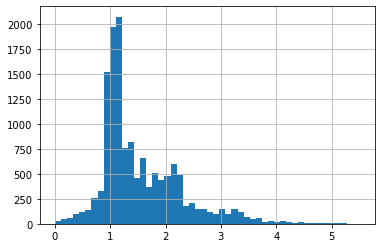

In [100]:
pd.Series(lista_delta_meses_pesos_no_plau_menor6meses).hist(bins=50)

<AxesSubplot:>

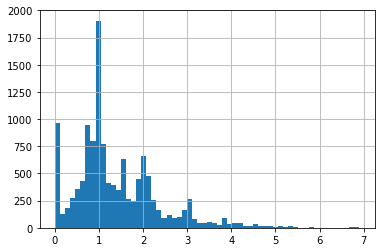

In [104]:
pd.Series(lista_delta_pesos_no_plau_menor6meses)[(pd.Series(lista_delta_pesos_no_plau_menor6meses)>=0)].hist(bins=60)

In [165]:
pd.Series(lista_delta_pesos_no_plau_menor6meses).describe([.01,.1,.25 , .5 , .75 , .90 , .95 , .99])

count    14024.000000
mean         1.146834
std          1.183508
min         -5.200000
1%          -2.000000
10%         -0.100000
25%          0.600000
50%          1.000000
75%          1.900000
90%          2.600000
95%          3.100000
99%          4.500000
max          6.900000
dtype: float64

In [166]:
pd.Series(lista_delta_pesos_no_plau_menor6meses)[(pd.Series(lista_delta_pesos_no_plau_menor6meses)>=0)].describe([.01,.1,.25 , .5 , .75 , .90 , .95 , .99])

count    12578.000000
mean         1.385657
std          0.969308
min          0.000000
1%           0.000000
10%          0.300000
25%          0.800000
50%          1.100000
75%          1.900000
90%          2.700000
95%          3.200000
99%          4.600000
max          6.900000
dtype: float64

In [161]:
pd.Series(lista_delta_meses_pesos_no_plau_6Ma2A).describe([.25 , .5 , .75 , .90 , .95 , .99])

count    43013.000000
mean         4.096989
std          2.637591
min          0.000000
25%          2.200000
50%          3.500000
75%          5.300000
90%          7.800000
95%          9.400000
99%         12.700000
max         17.500000
dtype: float64

<AxesSubplot:>

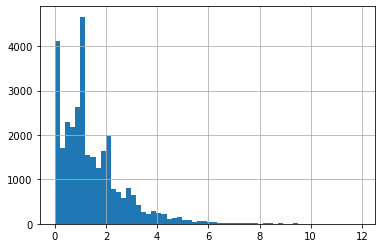

In [105]:
pd.Series(lista_delta_pesos_no_plau_6Ma2A)[(pd.Series(lista_delta_pesos_no_plau_6Ma2A)>=0)].hist(bins=60)

In [162]:
pd.Series(lista_delta_meses_pesos_no_plau_2Aa5A).describe([.25 , .5 , .75 , .90 , .95 , .99])

count    56847.000000
mean         6.751157
std          4.972722
min          0.000000
25%          3.300000
50%          5.400000
75%          8.900000
90%         13.200000
95%         16.800000
99%         24.154000
max         35.200000
dtype: float64

In [163]:
100/5000

0.02

In [164]:
0.02*15

0.3

<AxesSubplot:>

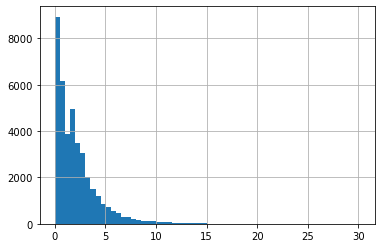

In [106]:
pd.Series(lista_delta_pesos_no_plau_2Aa5A)[(pd.Series(lista_delta_pesos_no_plau_2Aa5A)>=0)].hist(bins=60)

<AxesSubplot:>

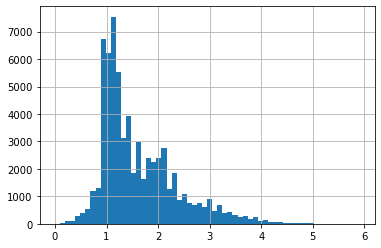

In [94]:
###########################################################################################################
#ahora con los plausibles
pd.Series(lista_delta_meses_pesos_plau_menor6meses).hist(bins=60)

<AxesSubplot:>

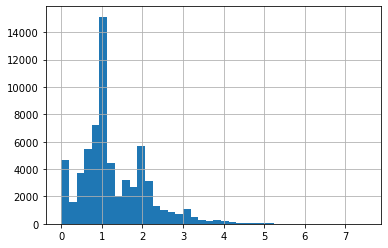

In [139]:
pd.Series(lista_delta_pesos_plau_menor6meses).hist(bins=40)

<AxesSubplot:>

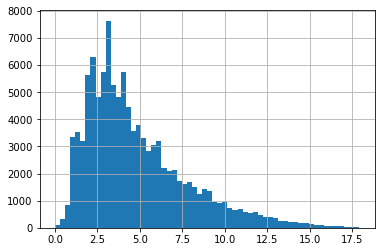

In [173]:
pd.Series(lista_delta_meses_pesos_plau_6Ma2A).hist(bins=60)

In [196]:
len(pd.Series(lista_delta_pesos_no_plau_6Ma2A))#[(pd.Series(lista_delta_pesos_plau_6Ma2A)<=0.1)])

43013

In [197]:
len(pd.Series(lista_delta_pesos_no_plau_2Aa5A))#[(pd.Series(lista_delta_pesos_plau_2Aa5A)<=0.1)])

56847

In [198]:
len(pd.Series(lista_delta_pesos_no_plau_menor6meses))#[(pd.Series(lista_delta_pesos_plau_menor6meses)<=0.1)])

14024

In [199]:
len(pd.Series(lista_delta_pesos_no_plau_5A_10A))#[(pd.Series(lista_delta_pesos_plau_5A_10A)<=0.1)])

NameError: name 'lista_delta_pesos_no_plau_5A_10A' is not defined

11714

In [188]:
len(pd.Series(lista_delta_pesos_plau_mayores10A))

40133

In [ ]:
#mayores10A

<AxesSubplot:>

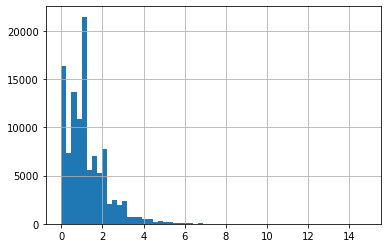

In [97]:
pd.Series(lista_delta_pesos_plau_6Ma2A).hist(bins=60)

<AxesSubplot:>

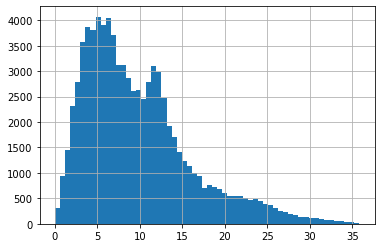

In [98]:
pd.Series(lista_delta_meses_pesos_plau_2Aa5A).hist(bins=60)

<AxesSubplot:>

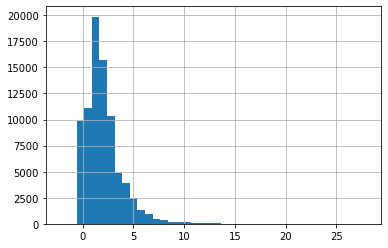

In [142]:
pd.Series(lista_delta_pesos_plau_2Aa5A).hist(bins=40)

In [108]:
#caso de solo dos datos que descienden talla o peso, se eliminan

#si el num de mediciones de talla o peso n , (n+1 o n-1) son iguales, queda la media

#caso contrario, el mayoritario, ya que acarrea menos cambios



In [114]:
#tasas para peso, series no plausibles

tasa_0M_6M_plau = pd.Series(lista_delta_pesos_plau_menor6meses)[(pd.Series(lista_delta_pesos_plau_menor6meses)>=0)].median()/pd.Series(lista_delta_meses_pesos_plau_menor6meses).median()
tasa_0M_6M_plau

0.7692307692307692

In [118]:
v = 3*0.7692307692307692
print('en promedio por mes aumenta: ' , v)

en promedio por mes aumenta:  2.3076923076923075


In [115]:
tasa_6M_2A_plau = pd.Series(lista_delta_pesos_plau_6Ma2A)[(pd.Series(lista_delta_pesos_plau_6Ma2A)>=0)].median()/pd.Series(lista_delta_meses_pesos_plau_6Ma2A).median()
tasa_6M_2A_plau

0.25

In [116]:
tasa_2A_5A_plau = pd.Series(lista_delta_pesos_plau_2Aa5A).median()/pd.Series(lista_delta_meses_pesos_plau_2Aa5A).median()
tasa_2A_5A_plau

0.20238095238095233

In [156]:

pd.Series(lista_delta_pesos_plau_6Ma2A).describe([.25, .5, .75, .90, .95, .99])

count    108703.000000
mean          1.204142
std           1.003210
min           0.000000
25%           0.500000
50%           1.000000
75%           1.700000
90%           2.500000
95%           3.100000
99%           4.600000
max          14.800000
dtype: float64

In [154]:
pd.Series(lista_delta_pesos_plau_menor6meses).describe([.25, .5, .75, .90, .95, .99])

count    65892.000000
mean         1.277569
std          0.828544
min          0.000000
25%          0.800000
50%          1.000000
75%          1.800000
90%          2.300000
95%          2.900000
99%          3.900000
max          7.500000
dtype: float64

In [155]:
6*0.7

4.199999999999999

In [172]:
pd.Series(lista_delta_pesos_plau_2Aa5A)[(pd.Series(lista_delta_pesos_plau_2Aa5A)>=0)&(pd.Series(lista_delta_pesos_plau_2Aa5A)<10)].describe([.25, .5, .75, .90, .95, .99])

count    81707.000000
mean         1.958875
std          1.651060
min          0.000000
25%          0.900000
50%          1.700000
75%          2.800000
90%          4.100000
95%          5.200000
99%          7.500000
max          9.900000
dtype: float64

In [ ]:
#la lista   lista_pesos_anormales